In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from math import erf, fabs

In [2]:
# Muon trigger efficiencies
muon_trigger = {
    "2016preVFP_UL": lambda pt, eta: 0.0 if pt < 10 or fabs(eta) > 2.4 else (
        0.5 * 0.952501 * (1.0 + erf((pt - 23.9491) / (2.0 * 0.405232))) if fabs(eta) <= 1.479
        else (0.5 * 0.951936 * (1.0 + erf((pt - 23.9399) / (2.0 * 0.533316))) if pt <= 100 else 0.774)
    ),
    "2016postVFP_UL": lambda pt, eta: 0.0 if pt < 10 or fabs(eta) > 2.4 else (
        0.5 * 0.963135 * (1.0 + erf((pt - 23.9546) / (2.0 * 0.363316))) if fabs(eta) <= 1.479
        else 0.5 * 0.96043 * (1.0 + erf((pt - 23.9677) / (2.0 * 0.463984)))
    ),
    "2017_UL": lambda pt, eta: 0.0 if pt < 10 or fabs(eta) > 2.4 else (
        (0.5 * 0.929318 * (1.0 + erf((pt - 26.9424) / (2.0 * 0.612448))) if pt <= 100 else 0.958305)
        if fabs(eta) <= 1.479
        else 0.5 * 0.94163 * (1.0 + erf((pt - 26.9092) / (2.0 * 0.844543)))
    ),
    "2018_UL": lambda pt, eta: 0.0 if pt < 10 or fabs(eta) > 2.4 else (
        0.5 * 0.950463 * (1.0 + erf((pt - 23.9593) / (2.0 * 0.375996))) if fabs(eta) <= 1.479
        else 0.5 * 0.953162 * (1.0 + erf((pt - 23.9459) / (2.0 * 0.457351)))
    ),
}

# Electron trigger efficiencies
electron_trigger = {
    "2016preVFP_UL": lambda pt, eta: 0.0 if pt < 10 or fabs(eta) > 2.4 else (
        0.5 * 0.980431 * (1.0 + erf((pt - 26.6311) / (2.0 * 0.977291))) if fabs(eta) <= 1.479
        else 0.5 * 0.984774 * (1.0 + erf((pt - 27.5187) / (2.0 * 1.33533)))
    ),
    "2016postVFP_UL": lambda pt, eta: 0.0 if pt < 10 or fabs(eta) > 2.4 else (
        0.5 * 0.975241 * (1.0 + erf((pt - 26.6834) / (2.0 * 1.08336))) if fabs(eta) <= 1.479
        else 0.5 * 0.981091 * (1.0 + erf((pt - 27.7339) / (2.0 * 1.44615)))
    ),
    "2017_UL": lambda pt, eta: 0.0 if pt < 10 or fabs(eta) > 2.4 else (
        0.5 * 0.955945 * (1.0 + erf((pt - 33.0345) / (2.0 * 0.885676))) if fabs(eta) <= 1.479
        else 0.5 * 0.962208 * (1.0 + erf((pt - 33.9927) / (2.0 * 1.55814)))
    ),
    "2018_UL": lambda pt, eta: 0.0 if pt < 10 or fabs(eta) > 2.4 else (
        0.5 * 0.962897 * (1.0 + erf((pt - 33.1188) / (2.0 * 0.844886))) if fabs(eta) <= 1.479
        else 0.5 * 0.975043 * (1.0 + erf((pt - 32.9805) / (2.0 * 1.18094)))
    ),
}

In [3]:
def plot_efficiency(trigger, plottitle, xlim):
    pt_values = np.linspace(0, 50, 100)  # Range of pT values for the plot

    # Create a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(8, 7), sharex=False, sharey=False)

    # Iterate over campaigns and plot
    for idx, (campaign, eff_func) in enumerate(trigger.items()):
        ax = axes[idx // 2, idx % 2]  # Locate subplot in 2x2 grid
        barrel_eff = [eff_func(pt, 1.2) for pt in pt_values]  # eta <= 1.479 (barrel)
        endcap_eff = [eff_func(pt, 1.8) for pt in pt_values]  # eta > 1.479 (endcap)

        # Plot both barrel and endcap efficiencies
        ax.plot(pt_values, barrel_eff, label=r"$|\eta| \leq 1.479$", color="red")
        ax.plot(pt_values, endcap_eff, label=r"$|\eta| > 1.479$", color="blue", linestyle="--")
        
        triggerline = None
        offline_cut = None
        if 'muon' in plottitle:
            triggerline = 24
            offline_cut = 26
            if '2017' in campaign:
                triggerline = 27
                offline_cut = 29
        elif 'electron' in plottitle:
            triggerline = 32
            offline_cut = 35
            if '2016' in campaign:
                triggerline = 27
                offline_cut = 30
            elif '2017' in campaign:
                triggerline = 35
                offline_cut = 37
        if triggerline is not None: ax.axvline(x=triggerline, label='trigger',        color='k', linestyle='-', linewidth=1)
        if offline_cut is not None: ax.axvline(x=offline_cut, label='offline pT-cut', color='k', linestyle='--', linewidth=1)
        
        # Add labels and title
        # ax.set_title(campaign)
        ax.set_xlabel("pT [GeV]")
        ax.set_xlim(xlim[0], xlim[1])
        ax.set_ylabel("Efficiency")
        ax.set_ylim(0, 1)
        ax.legend(loc='center left', fontsize=8)
        ax.tick_params(axis='both', which='both', top=True, right=True)
            
        ax.text(0.03, 0.86, 'CMS', transform=ax.transAxes, fontsize=22, fontweight='bold',family='sans-serif')
        ax.text(0.03, 0.78, campaign.replace('_', ' '), transform=ax.transAxes, fontsize=10,family='sans-serif')

    # Adjust layout and display the plot
    fig.suptitle(plottitle, fontsize=14, family='sans-serif')
    plt.tight_layout()

    outdir = os.path.join('plots', 'TriggerEfficiency')
    os.makedirs(outdir, exist_ok=True)
    figurepath = os.path.join(outdir, plottitle.replace(' ', '_')+'.png')
    plt.savefig(figurepath, dpi=150)
    print('File saved: '+figurepath)
    
    plt.show()

File saved: plots/TriggerEfficiency/Trigger_efficiency_(muons).png


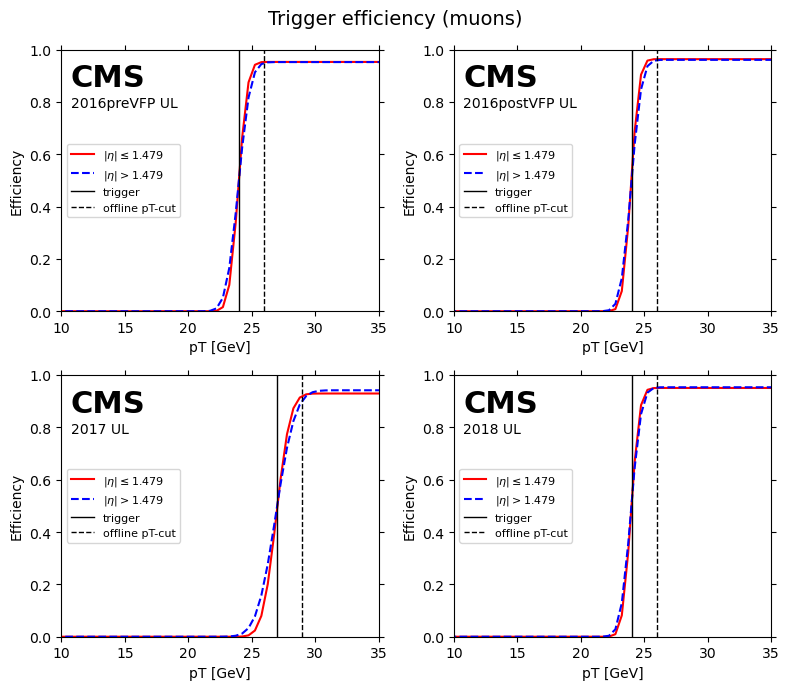

In [4]:
plot_efficiency(muon_trigger, "Trigger efficiency (muons)", xlim=(10, 35))

File saved: plots/TriggerEfficiency/Trigger_efficiency_(electrons).png


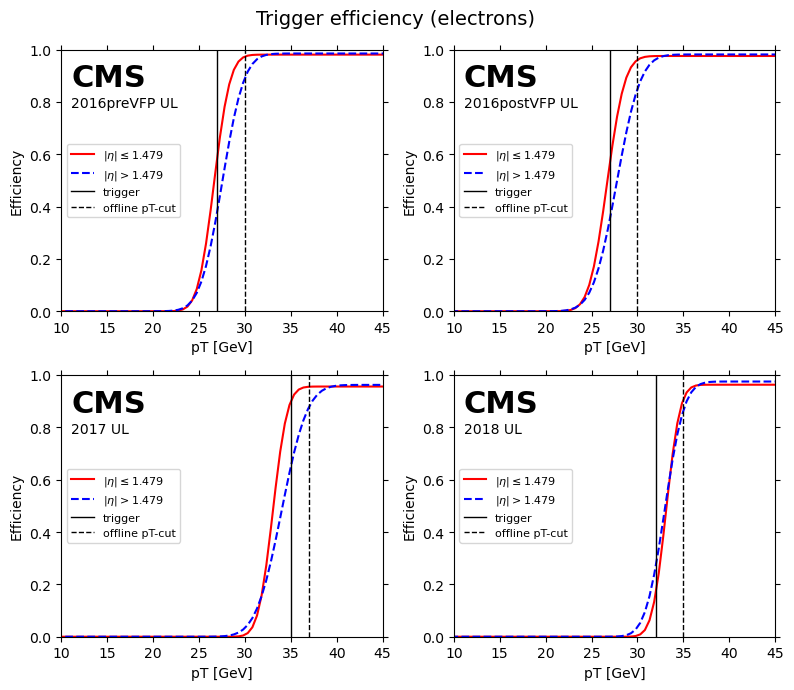

In [5]:
plot_efficiency(electron_trigger, "Trigger efficiency (electrons)", xlim=(10, 45))